In [9]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("master_dataset_cleaned.csv")

# Combine Year + Month into a datetime column
df["Month_year"] = pd.to_datetime(df["Year"].astype(str) + "-" + df["Month"].astype(str) + "-01")
head = df.head()
print(head)

age_dict = {
    0: "Under 1",
    1: "1-4",
    2: "5-9",
    3: "10-14",
    4: "15-18",
    5: "19-24",
    6: "25-29",
    7: "30-34",
    8: "35-39",
    9: "40-44",
    10: "45-49",
    11: "50-54",
    12: "55-59",
    13: "60-64",
    14: "65-69",
    15: "70+"
}
df["Age_label"] = df["Age_range"].map(age_dict)

   Year  Month  Consultation_Type  Case  Sex  Age_range  Total Month_year
0  2023      4                  1     1    1          0   29.0 2023-04-01
1  2023      4                  1     2    1          0    NaN 2023-04-01
2  2023      4                  1     3    1          0   12.0 2023-04-01
3  2023      4                  1     4    1          0    1.0 2023-04-01
4  2023      4                  1     5    1          0   30.0 2023-04-01


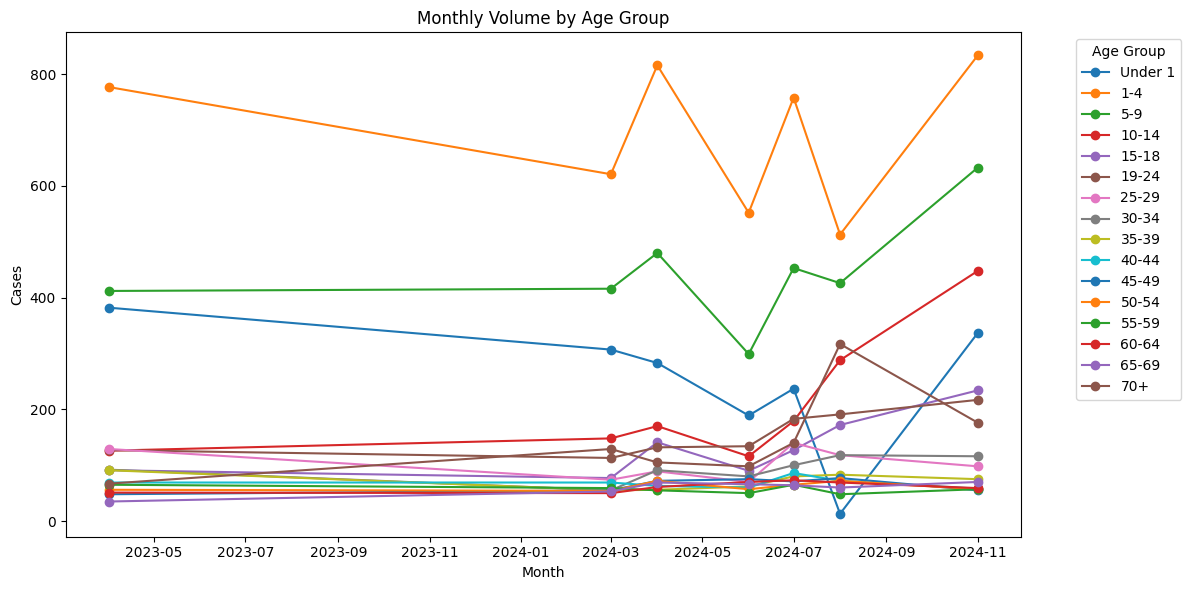

In [10]:
plt.figure(figsize=(12,6))

for age in df["Age_label"].unique():
    subset = df[df["Age_label"] == age]
    monthly = subset.groupby("Month_year")["Total"].sum().reset_index()
    plt.plot(monthly["Month_year"], monthly["Total"], marker="o", label=age)

plt.title("Monthly Volume by Age Group")
plt.xlabel("Month")
plt.ylabel("Cases")
plt.legend(title="Age Group", bbox_to_anchor=(1.05,1), loc="upper left")
plt.tight_layout()
plt.show()


In [ ]:
overall = df.groupby("Month_year")["Total"].sum().reset_index()

plt.figure(figsize=(10,5))
plt.plot(overall["Month_year"], overall["Total"], marker="o", color="blue")
plt.title("Overall Monthly Volume (All Age Groups)")
plt.xlabel("Month")
plt.ylabel("Total Cases")
plt.grid(True)
plt.show()
